In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score

In [71]:
df=pd.read_csv("./dummy dataset/localhost_1_pcap_Flow.csv")

In [72]:
#display all columns adn rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,127.128.127.0-0.1.127.0-0-0-0,127.128.127.0,0,0.1.127.0,0,0,21/07/2020 02:27:17 PM,294,2,0,0,0,0,0,0,0,0,0,0,0,0,6802.721088,294.0,0.000000e+00,294,294,294,294.0,0.000000e+00,294,294,0,0,0,0,0,0,0,0,0,0,0,6802.721088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel
1,202.164.127.0-0.1.127.0-0-0-0,202.164.127.0,0,0.1.127.0,0,0,21/07/2020 03:15:28 PM,8993,2,0,0,0,0,0,0,0,0,0,0,0,0,222.395196,8993.0,0.000000e+00,8993,8993,8993,8993.0,0.000000e+00,8993,8993,0,0,0,0,0,0,0,0,0,0,0,222.395196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel
2,60.206.127.0-0.1.127.0-0-0-0,60.206.127.0,0,0.1.127.0,0,0,21/07/2020 03:38:21 PM,88320782,3,0,0,0,0,0,0,0,0,0,0,0,0,0.033967,44160391.0,6.243523e+07,88308769,12013,88320782,44160391.0,6.243523e+07,88308769,12013,0,0,0,0,0,0,0,0,0,0,0,0.033967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7.976640e+14,1.128067e+15,1.595328e+15,88308769.0,NeedManualLabel
3,127.139.127.0-0.1.127.0-0-0-0,127.139.127.0,0,0.1.127.0,0,0,21/07/2020 02:27:17 PM,366,2,0,0,0,0,0,0,0,0,0,0,0,0,5464.480874,366.0,0.000000e+00,366,366,366,366.0,0.000000e+00,366,366,0,0,0,0,0,0,0,0,0,0,0,5464.480874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel
4,56.248.127.0-0.53.127.0-0-0-0,56.248.127.0,0,0.53.127.0,0,0,21/07/2020 02:27:17 PM,262,2,0,0,0,0,0,0,0,0,0,0,0,0,7633.587786,262.0,0.000000e+00,262,262,262,262.0,0.000000e+00,262,262,0,0,0,0,0,0,0,0,0,0,0,7633.587786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel


In [74]:
# subflow fwd packets ave all 1 so it is good to drop it
non_zero_columns = ['Flow Duration', 'Total Fwd Packet', 'Flow Packets/s','Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max','Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Fwd Packets/s', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min' ]

In [75]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [76]:
df.groupby('Label').first()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NeedManualLabel,127.128.127.0-0.1.127.0-0-0-0,127.128.127.0,0,0.1.127.0,0,0,21/07/2020 02:27:17 PM,294,2,0,0,0,0,0,0,0,0,0,0,0,0,6802.721088,294.0,0.0,294,294,294,294.0,0.0,294,294,0,0,0,0,0,0,0,0,0,0,0,6802.721088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [77]:
df.groupby('Label').first()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NeedManualLabel,127.128.127.0-0.1.127.0-0-0-0,127.128.127.0,0,0.1.127.0,0,0,21/07/2020 02:27:17 PM,294,2,0,0,0,0,0,0,0,0,0,0,0,0,6802.721088,294.0,0.0,294,294,294,294.0,0.0,294,294,0,0,0,0,0,0,0,0,0,0,0,6802.721088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     91 non-null     object 
 1   Src IP                      91 non-null     object 
 2   Src Port                    91 non-null     int64  
 3   Dst IP                      91 non-null     object 
 4   Dst Port                    91 non-null     int64  
 5   Protocol                    91 non-null     int64  
 6   Timestamp                   91 non-null     object 
 7   Flow Duration               91 non-null     int64  
 8   Total Fwd Packet            91 non-null     int64  
 9   Total Bwd packets           91 non-null     int64  
 10  Total Length of Fwd Packet  91 non-null     int64  
 11  Total Length of Bwd Packet  91 non-null     int64  
 12  Fwd Packet Length Max       91 non-null     int64  
 13  Fwd Packet Length Min       91 non-nu

In [79]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,91.0,91.0,91.0,9.100000e+01,91.000000,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.000000,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,0.0,0.0,0.0,5.208120e+07,4.527473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1751.440848,2.272756e+07,1.235378e+07,3.906190e+07,1.438560e+07,5.208120e+07,2.272756e+07,1.235378e+07,3.906190e+07,1.438560e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1751.440848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.210257e+14,1.838360e+14,8.239600e+14,4.558075e+14
std,0.0,0.0,0.0,4.576180e+07,3.930905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5267.662226,3.056479e+07,1.938606e+07,3.863762e+07,3.125633e+07,4.576180e+07,3.056479e+07,1.938606e+07,3.863762e+07,3.125633e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5267.662226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.328615e+14,3.631352e+14,8.016466e+14,7.246877e+14
min,0.0,0.0,0.0,5.900000e+01,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017307,5.900000e+01,0.000000e+00,5.900000e+01,2.200000e+01,5.900000e+01,5.900000e+01,0.000000e+00,5.900000e+01,2.200000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,8.899500e+03,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047284,8.625000e+03,0.000000e+00,8.625000e+03,4.215000e+02,8.899500e+03,8.625000e+03,0.000000e+00,8.625000e+03,4.215000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,5.395696e+07,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125802,9.437346e+06,4.313351e+01,3.302754e+07,5.097000e+03,5.395696e+07,9.437346e+06,4.313351e+01,3.302754e+07,5.097000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [80]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [81]:
# Data Transfer Bytes (20 MB data download)
# No. of Packets (200 packets per sec)
# Session Time (2 Min/session)
# Forward Packets (100 packets/session)
# Backward Packets (100 packets/session)
df = df[non_zero_columns]

In [82]:
df.head(100)

,Flow Duration,Total Fwd Packet,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Fwd Packets/s,Idle Mean,Idle Std,Idle Max,Idle Min
0,294,2,6802.721088,2.940000e+02,0.000000e+00,294,294,294,2.940000e+02,0.000000e+00,294,294,6802.721088,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,8993,2,222.395196,8.993000e+03,0.000000e+00,8993,8993,8993,8.993000e+03,0.000000e+00,8993,8993,222.395196,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,88320782,3,0.033967,4.416039e+07,6.243523e+07,88308769,12013,88320782,4.416039e+07,6.243523e+07,88308769,12013,0.033967,7.976640e+14,1.128067e+15,1.595328e+15,8.830877e+07
3,366,2,5464.480874,3.660000e+02,0.000000e+00,366,366,366,3.660000e+02,0.000000e+00,366,366,5464.480874,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,262,2,7633.587786,2.620000e+02,0.000000e+00,262,262,262,2.620000e+02,0.000000e+00,262,262,7633.587786,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,275,2,7272.727273,2.750000e+02,0.000000e+00,275,275,275,2.750000e+02,0.000000e+00,275,275,7272.727273,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,11241,2,177.920114,1.124100e+04,0.000000e+00,11241,11241,11241,1.124100e+04,0.000000e+00,11241,11241,177.920114,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,9374,2,213.356091,9.374000e+03,0.000000e+00,9374,9374,9374,9.374000e+03,0.000000e+00,9374,9374,213.356091,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,8444,2,236.854571,8.444000e+03,0.000000e+00,8444,8444,8444,8.444000e+03,0.000000e+00,8444,8444,236.854571,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,281,2,7117.437722,2.810000e+02,0.000000e+00,281,281,281,2.810000e+02,0.000000e+00,281,281,7117.437722,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [83]:
df.describe()

,Flow Duration,Total Fwd Packet,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Fwd Packets/s,Idle Mean,Idle Std,Idle Max,Idle Min
count,9.100000e+01,91.000000,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,5.208120e+07,4.527473,1751.440848,2.272756e+07,1.235378e+07,3.906190e+07,1.438560e+07,5.208120e+07,2.272756e+07,1.235378e+07,3.906190e+07,1.438560e+07,1751.440848,7.210257e+14,1.838360e+14,8.239600e+14,4.558075e+14
std,4.576180e+07,3.930905,5267.662226,3.056479e+07,1.938606e+07,3.863762e+07,3.125633e+07,4.576180e+07,3.056479e+07,1.938606e+07,3.863762e+07,3.125633e+07,5267.662226,7.328615e+14,3.631352e+14,8.016466e+14,7.246877e+14
min,5.900000e+01,2.000000,0.017307,5.900000e+01,0.000000e+00,5.900000e+01,2.200000e+01,5.900000e+01,5.900000e+01,0.000000e+00,5.900000e+01,2.200000e+01,0.017307,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.899500e+03,2.000000,0.047284,8.625000e+03,0.000000e+00,8.625000e+03,4.215000e+02,8.899500e+03,8.625000e+03,0.000000e+00,8.625000e+03,4.215000e+02,0.047284,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.395696e+07,3.000000,0.125802,9.437346e+06,4.313351e+01,3.302754e+07,5.097000e+03,5.395696e+07,9.437346e+06,4.313351e+01,3.302754e+07,5.097000e+03,0.125802,7.976620e+14,0.000000e+00,1.595322e+15,3.943101e+07
75%,9.200091e+07,6.000000,231.986223,3.387287e+07,1.997743e+07,7.244389e+07,8.566430e+05,9.200091e+07,3.387287e+07,1.997743e+07,7.244389e+07,8.566430e+05,231.986223,1.595322e+15,6.240747e+07,1.595327e+15,1.595322e+15
max,1.196836e+08,17.000000,33898.305085,1.155626e+08,8.197210e+07,1.196270e+08,1.155626e+08,1.196836e+08,1.155626e+08,8.197210e+07,1.196270e+08,1.155626e+08,33898.305085,1.595332e+15,1.128067e+15,1.595332e+15,1.595332e+15


In [84]:
from scipy import stats

In [85]:
X = df

In [86]:
df.dtypes

Flow Duration         int64
Total Fwd Packet      int64
Flow Packets/s      float64
Flow IAT Mean       float64
Flow IAT Std        float64
Flow IAT Max          int64
Flow IAT Min          int64
Fwd IAT Total         int64
Fwd IAT Mean        float64
Fwd IAT Std         float64
Fwd IAT Max           int64
Fwd IAT Min           int64
Fwd Packets/s       float64
Idle Mean           float64
Idle Std            float64
Idle Max            float64
Idle Min            float64
dtype: object

In [87]:
# subflow fwd packets have values infinity after zscore because it has all values being 1 so discarding that columns
for col in X:
    X[col] = stats.zscore(X[col])

# for c in X.columns:
#     X[c] = (X[c] - np.mean(X[c]))/(np.max(X[c])-np.min(X[c]))
    


In [88]:
X.head()

,Flow Duration,Total Fwd Packet,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Fwd Packets/s,Idle Mean,Idle Std,Idle Max,Idle Min
0,-1.144392,-0.646537,0.964235,-0.747696,-0.640781,-1.016574,-0.462786,-1.144392,-0.747696,-0.640781,-1.016574,-0.462786,0.964235,-0.989301,-0.509051,-1.033529,-0.632456
1,-1.144201,-0.646537,-0.291878,-0.747410,-0.640781,-1.016348,-0.462507,-1.144201,-0.747410,-0.640781,-1.016348,-0.462507,-0.291878,-0.989301,-0.509051,-1.033529,-0.632456
2,0.796305,-0.390733,-0.334325,0.705111,2.597687,1.281645,-0.462409,0.796305,0.705111,2.597687,1.281645,-0.462409,-0.334325,0.105153,2.614625,0.967560,-0.632455
3,-1.144391,-0.646537,0.708780,-0.747694,-0.640781,-1.016573,-0.462784,-1.144391,-0.747694,-0.640781,-1.016573,-0.462784,0.708780,-0.989301,-0.509051,-1.033529,-0.632456
4,-1.144393,-0.646537,1.122839,-0.747697,-0.640781,-1.016575,-0.462788,-1.144393,-0.747697,-0.640781,-1.016575,-0.462788,1.122839,-0.989301,-0.509051,-1.033529,-0.632456


In [89]:
len(df.columns)

17

In [90]:
X.dtypes

Flow Duration       float64
Total Fwd Packet    float64
Flow Packets/s      float64
Flow IAT Mean       float64
Flow IAT Std        float64
Flow IAT Max        float64
Flow IAT Min        float64
Fwd IAT Total       float64
Fwd IAT Mean        float64
Fwd IAT Std         float64
Fwd IAT Max         float64
Fwd IAT Min         float64
Fwd Packets/s       float64
Idle Mean           float64
Idle Std            float64
Idle Max            float64
Idle Min            float64
dtype: object

In [91]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



### K Means

In [92]:
from sklearn.cluster import KMeans

In [93]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")

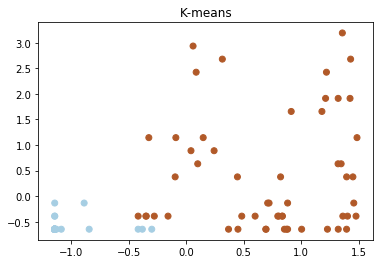

In [94]:
kmeans(X,n_clusters=2)

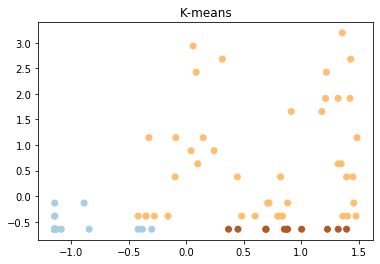

In [95]:
kmeans(X,n_clusters=3)

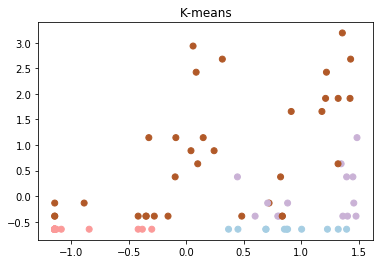

In [96]:
kmeans(X,n_clusters=4)

### DBSCAN


In [97]:
from sklearn.cluster import DBSCAN

In [98]:
# The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# This is not a maximum bound on the distances of points within a cluster.
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")


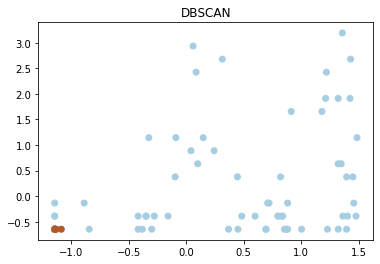

In [99]:
dbscan(X,eps=.3,min_samples=5)

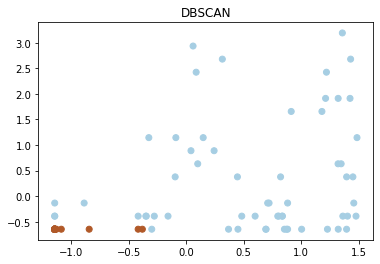

In [100]:
dbscan(X,eps=2,min_samples=20)

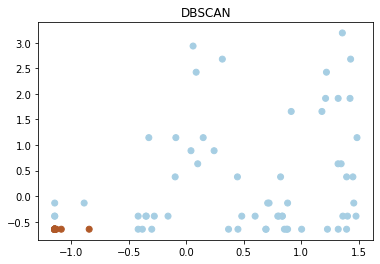

In [101]:
dbscan(X,eps=1.5,min_samples=20)

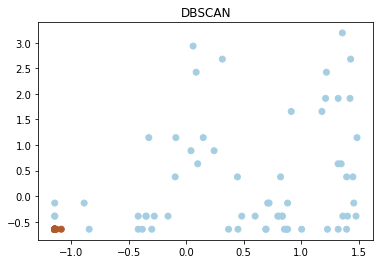

In [102]:
dbscan(X,eps=1,min_samples=20)

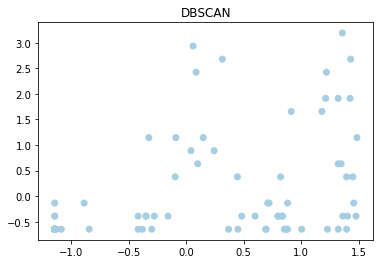

In [103]:
dbscan(X,eps=0.5,min_samples=20)

## Outlier detection

In [111]:
def outlier_detection_dbscan(eps, min_samples, X):
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    outliers = []
    for i in range(len(X)):
        if db.labels_[i] == -1:
            outliers.append(X[i])
        elif db.labels_[i] == 0:
            cluster_0.append(X[i])
        elif db.labels_[i] == 1:
            cluster_1.append(X[i])
        elif db.labels_[i] == 2:
            cluster_2.append(X[i])
        elif db.labels_[i] == 3:
            cluster_3.append(X[i])
        elif db.labels_[i] == 4:
            cluster_4.append(X[i])
        elif db.labels_[i] == 5:
            cluster_5.append(X[i])
            
    if len(cluster_0) > 0:
        x_0 = []
        y_0 = []
        for i in range(len(cluster_0)):
            x_0.append(cluster_0[i][0])
            y_0.append(cluster_0[i][1])
        plt.scatter(x_0, y_0,c='b', cmap='Paired')
        print("Length of cluster 0 : ", len(cluster_0))

        
    if len(cluster_1) > 0:
        x_1 = []
        y_1 = []
        for i in range(len(cluster_1)):
            x_1.append(cluster_1[i][0])
            y_1.append(cluster_1[i][1])
        plt.scatter(x_1, y_1,c='g', cmap='Paired')
        print("Length of cluster 1 : ", len(cluster_1))

    
    if len(cluster_2) > 0:
        x_2 = []
        y_2 = []
        for i in range(len(cluster_2)):
            x_2.append(cluster_2[i][0])
            y_2.append(cluster_2[i][1])
        plt.scatter(x_2, y_2,c='y', cmap='Paired')
        print("Length of cluster 2 : ", len(cluster_2))

            
    if len(cluster_3) >0:
        x_3 = []
        y_3 = []
        for i in range(len(cluster_3)):
            x_3.append(cluster_3[i][0])
            y_3.append(cluster_3[i][1])
        plt.scatter(x_3, y_3,c='b', marker = "1" ,cmap='Paired')
        print("Length of cluster 3 : ", len(cluster_3))

            
    if len(cluster_4) > 0:
        x_4 = []
        y_4 = []
        for i in range(len(cluster_4)):
            x_4.append(cluster_4[i][0])
            y_4.append(cluster_4[i][1])
        plt.scatter(x_4, y_4,c='b',marker = "2", cmap='Paired')
        print("Length of cluster 4 : ", len(cluster_4))

            
    if len(cluster_5) > 0:
        x_5 = []
        y_5 = []
        for i in range(len(cluster_5)):
            x_5.append(cluster_5[i][0])
            y_5.append(cluster_5[i][1])
        plt.scatter(x_5, y_5,c='b',marker = "3", cmap='Paired')
        print("Length of cluster 5 : ", len(cluster_5))

            
    if len(outliers) > 0:    
        # outliers
        x = []
        y = []
        for i in range(len(outliers)):
            x.append(outliers[i][0])
            y.append(outliers[i][1])
        plt.scatter(x, y,c='r', marker = '*', cmap='Paired') #outlier
        print("Number of outliers : ", len(outliers))


Length of cluster 0 :  8
Length of cluster 1 :  13
Number of outliers :  70


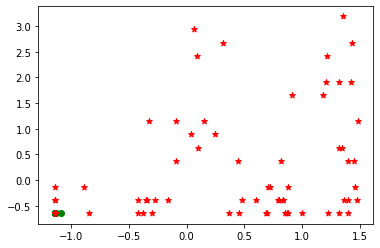

In [112]:
outlier_detection_dbscan(0.3, 6, X)

Length of cluster 0 :  13
Length of cluster 1 :  13
Number of outliers :  65


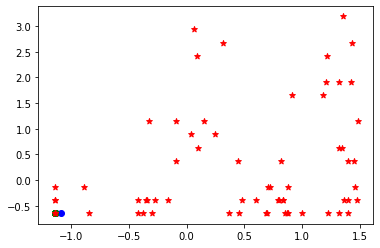

In [113]:
outlier_detection_dbscan(0.6, 10, X)

Length of cluster 0 :  27
Number of outliers :  64


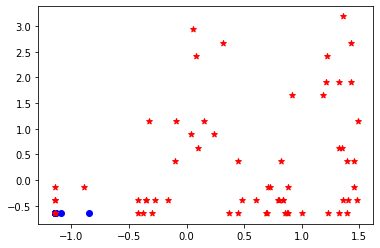

In [114]:
outlier_detection_dbscan(1, 15, X)

Length of cluster 0 :  26
Number of outliers :  65


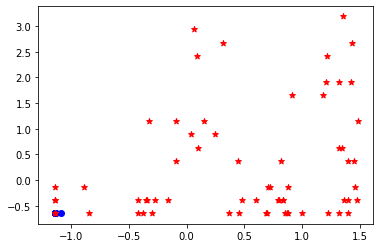

In [115]:
outlier_detection_dbscan(1.3, 20, X)

Number of outliers :  91


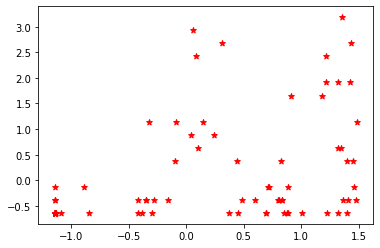

In [116]:
outlier_detection_dbscan(0.3, 20, X)

Length of cluster 0 :  8
Length of cluster 1 :  12
Length of cluster 2 :  2
Length of cluster 3 :  2
Length of cluster 4 :  2
Length of cluster 5 :  2
Number of outliers :  57


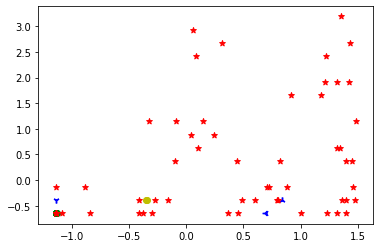

In [117]:
outlier_detection_dbscan(0.1, 2, X)

### Hierarchical clustering

In [118]:
from sklearn.cluster import AgglomerativeClustering

In [119]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")


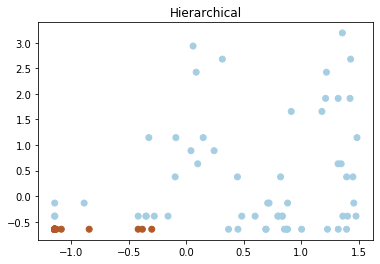

In [120]:
hier(X,n_clusters=2)

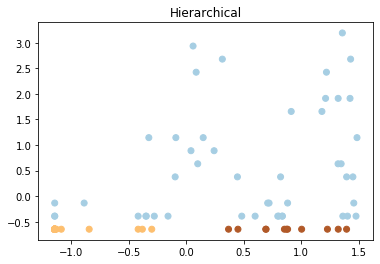

In [121]:
hier(X,n_clusters=3)

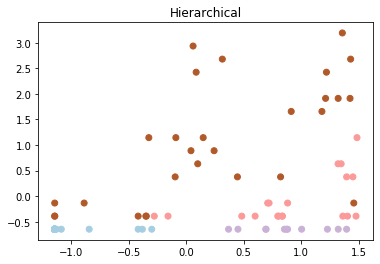

In [122]:
hier(X,n_clusters=4)